In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2)) #模拟100个样本 每个样本有2个特征
X[:,0] = np.random.uniform(0., 100., size=100) #随机生成X矩阵的第一列，范围在[0,100)，间隔相等
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100) #生成X矩阵第二列，并添加上均值为0，方差为10的浮点数作为干扰

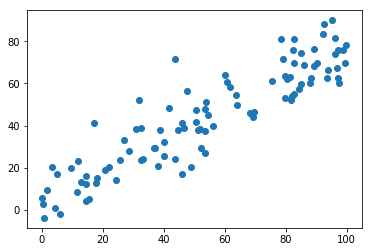

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0) #axis=0,压缩行，求各列的均值

In [5]:
X_demean = demean(X)

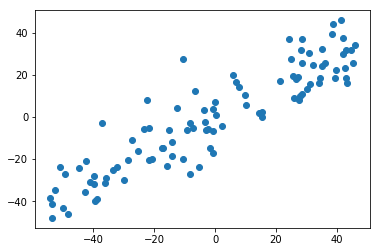

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

-2.0747847884194925e-14

In [8]:
np.mean(X_demean[:,1])

1.1510792319313624e-14

### 梯度上升法

In [9]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

def df_math(w, X):
    return 2. * X.T.dot(X.dot(w)) / len(X)

def df_debug(w, X, epsilon = 0.0001): #epsilon取这么小的原因是，w是单位向量，模长为1。所以向量值很小，对应epsilon应该也要取的小一些
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon) #因为w1和w2只在i这个位置上的元素有变化，所以其他位置经过相减的运算都为0
    return res



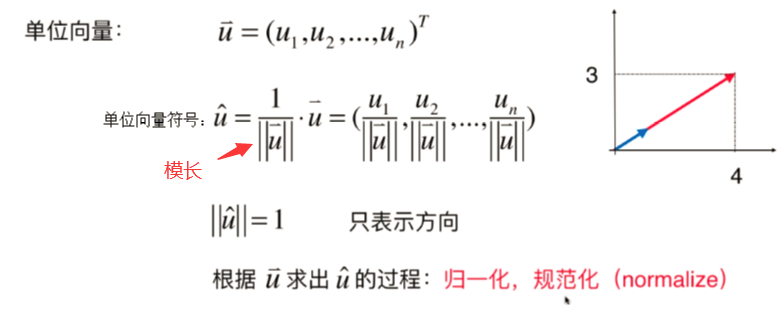

In [10]:
#进行归一化的操作
def direction(w):
    return w / np.linalg.norm(w) #np.linalg.norm() 返回的是模长

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) #经过梯度上升，需要重新进行归一化操作，确保w始终是单位向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [11]:
initial_w = np.random.random(X.shape[1]) # initial_w 如果为0，f得到也是0。但是我们要求f的最大值，不是最小值。所以initial_w不能为0
initial_w

array([0.57419472, 0.80954296])

In [12]:
eta = 0.001
#注意：不能对数据进行归一化操作。由于我们就是要通过原始数据得到w方向的轴使得样本映射
#到轴上的距离越大。如果进行了归一化，求出的PCA是和原始数据不一样的

In [13]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.79516612, 0.60639165])

In [14]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.79516612, 0.60639165])

In [15]:
w = gradient_ascent(df_debug, X_demean, initial_w, eta)

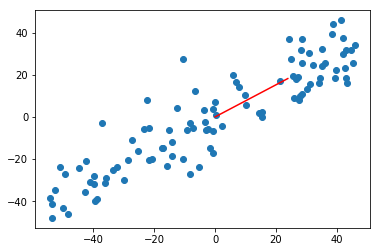

In [17]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r') #绘制从（0, w[0]*30）到（0, w[1]*30）的线段
plt.show()

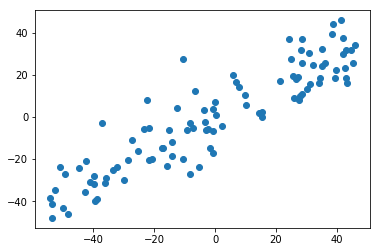

In [18]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot(w[0]*30, w[1]*30, color='r')
plt.show()

### 使用极端数据集测试

In [19]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

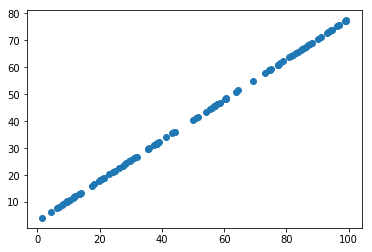

In [20]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [21]:
X2_demean = demean(X2)

In [22]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

In [23]:
w2

array([0.79999976, 0.60000032])

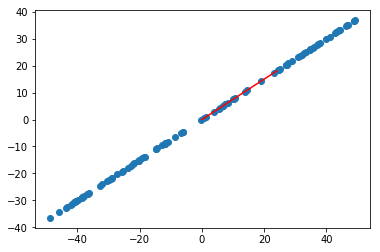

In [24]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()